 # **6. Графические возможности библиотеки Seaborn**

  Если вы подумали, что Matplotlib — это потолок визуализации в Python, то спешим сообщить вам, что это не так, и представляем Seaborn.

НЕМНОГО О БИБЛИОТЕКЕ

[Seaborn](http://seaborn.pydata.org/index.html) — надстройка над библиотекой Matplotlib, которая значительно расширяет её возможности, позволяя создавать графики более высокого уровня с эстетичным оформлением. Библиотека предоставляет большое количество дополнительных опций для творчества при визуализации данных.

Установка библиотеки стандартна. В командной строке (или командной строке Anaconda) выполните следующее:

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Традиционно Seaborn импортируется под псевдонимом sns:

In [3]:
import seaborn as sns
print(sns.__version__)

0.13.2


В данном разделе мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

Для фильтрации по списку значений используем метод [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

⭐ А теперь снова немного магии Feature Engineering, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred).

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib as mpl

In [33]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data = pd.read_csv('data/country_vaccinations.csv') 
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [34]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Начнём с гистограммы. Для визуализации гистограмм в библиотеке Seaborn используется метод [histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html).

У данного метода (как и у всех методов библиотеки Seaborn) огромнейшее количество параметров. Мы приведём лишь основные.

Основные параметры метода histplot()

 * data — DataFrame, по которому строится график;

 * x — признак, который будет отложен по оси абсцисс;

 * y — признак, который будет отложен по оси ординат;

 * hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

 * ax — система координат Matplotlib, в которой строится график;

 * color — цвет графика;

 * bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
 
 * kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

In [35]:
import matplotlib.pyplot as plt

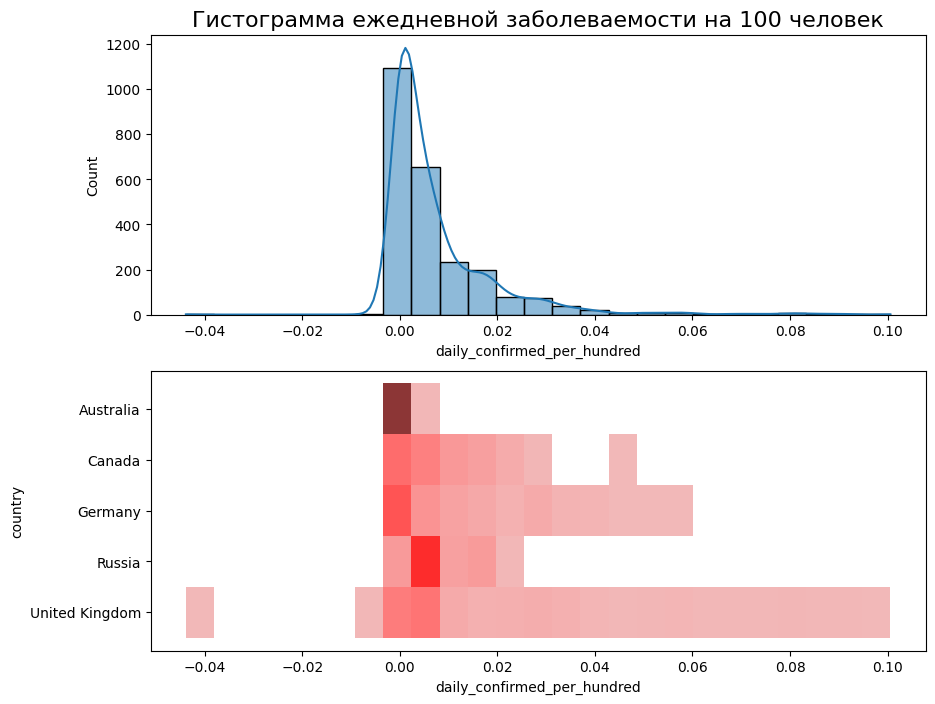

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить в модуле по очистке данных.

На самом деле при использовании Seaborn необязательно передавать координатные плоскости в аргументы функций. Графики в библиотеке вполне себе самодостаточны: функции для построения графика возвращают объект Axes из библиотеки Matplotlib, с которыми мы уже умеем работать. Достаточно просто занести результат выполнения функции в переменную и использовать её для настройки графика.

Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate), который вы создавали ранее в задании 3.3.

Коробчатые диаграммы в Seaborn строятся с помощью метода [boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

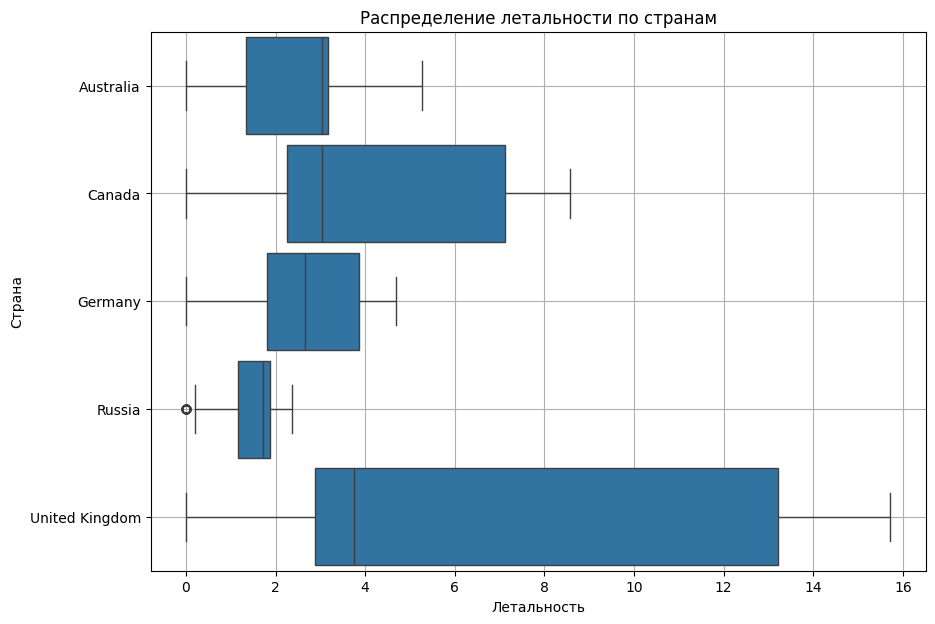

In [23]:

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [24]:
croped_covid_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2440 non-null   datetime64[ns]
 1   country                              2440 non-null   object        
 2   confirmed                            2440 non-null   float64       
 3   deaths                               2440 non-null   float64       
 4   recovered                            2440 non-null   float64       
 5   active                               2440 non-null   float64       
 6   daily_confirmed                      2435 non-null   float64       
 7   daily_deaths                         2435 non-null   float64       
 8   daily_recovered                      2435 non-null   float64       
 9   total_vaccinations                   649 non-null    float64       
 10  people_vacci

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод [barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

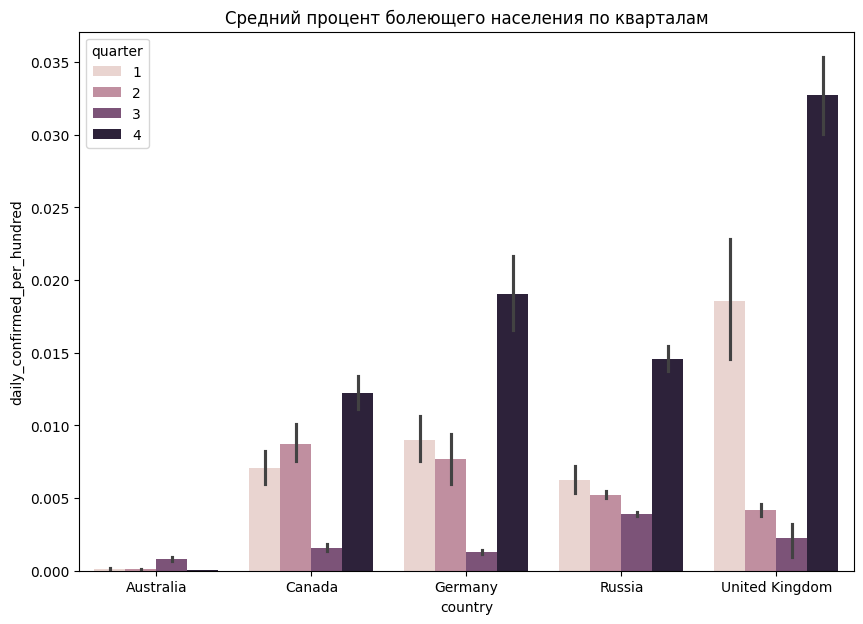

In [25]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

Построим один из самых любимых дата-сайентистами графиков — [jointplot()](https://seaborn.pydata.org/generated/seaborn.jointplot.html) — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

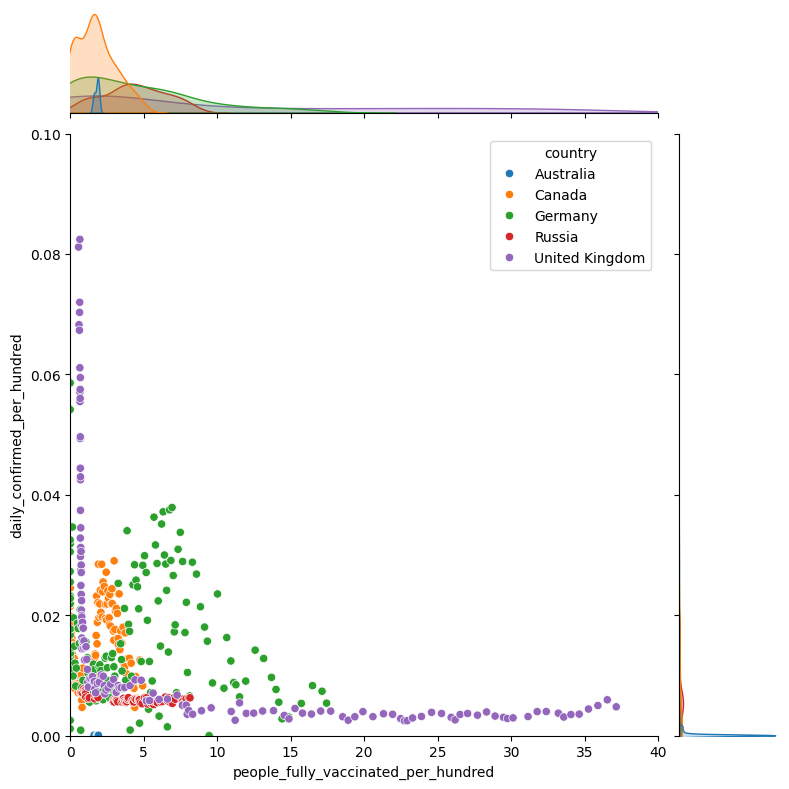

In [26]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [27]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


Для построения тепловой карты в Seaborn используется метод [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за [цветовую гамму](https://matplotlib.org/stable/users/explain/colors/colormaps.html) графика.

In [28]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

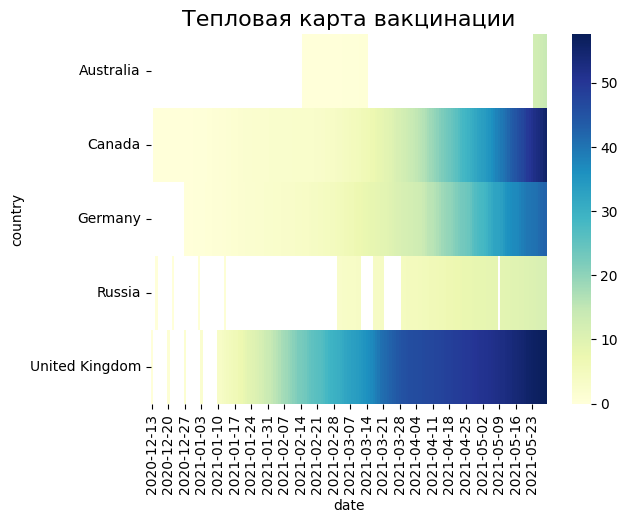

In [29]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

✍ Как вы уже успели понять, Seaborn расширяет границы визуализации, делает её более информативной и понятной. Графики становятся более приятными визуально, и их вполне можно использовать для отчёта по анализу рынка, демонстрации результатов моделирования и т. д.

Предлагаем вам потренироваться в использовании Seaborn ↓

*Задание 6.1*

Найдите в [документации по библиотеке Seaborn](https://seaborn.pydata.org/index.html#) название графика, который позволяет строить матрицу из диаграмм рассеяния для всех пар числовых признаков, а на диагонали этой матрицы отображаются гистограммы. Например:

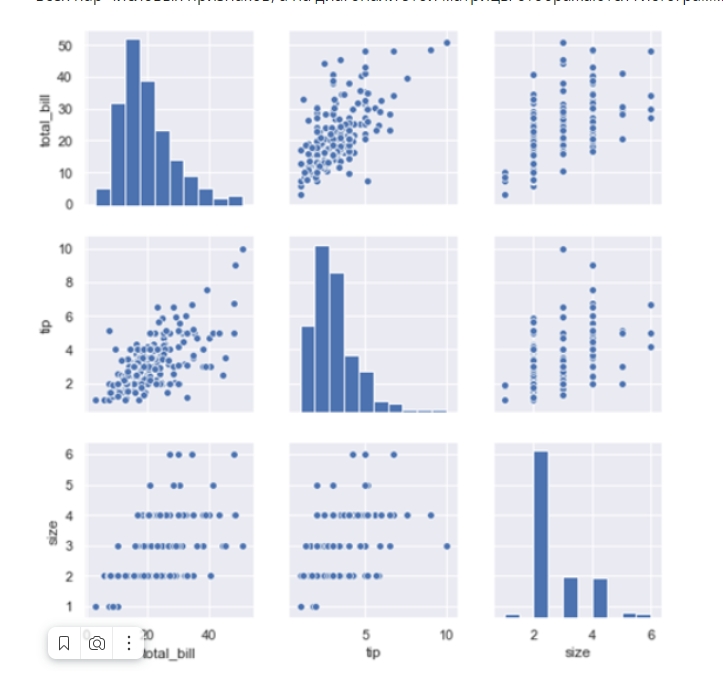

**pairplot()**

Данный метод предназначен для построения отображения попарной зависимости между всеми числовыми признаками в виде диаграмм рассеяния.


*Задание 6.2*

С помощью какого параметра в графиках Seaborn можно группировать данные по признаку и отображать каждую категорию разным цветом?

**hue**

Данный параметр позволяет строить графики для каждой уникальной категории признака, который указан в этом параметре (группировка данных по цветам).

*Задание 6.3*

Какой график строит код ниже?

**Столбчатую диаграмму, отображающую процентное отношение вакцинированных людей к общей численности населения страны**

```sns.barplot(
    data=croped_covid_df,
    x='country',
    y='total_vaccinations_per_hundred',
    estimator=max
)





*Задание 6.4*

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ($\frac{confirmed}{populaton}*100$).

Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:

*Подсказка* (1 из 1): Постройте сводную таблицу, столбцы которой — даты, строки — страны, а ячейки — процент заболевшего населения.

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

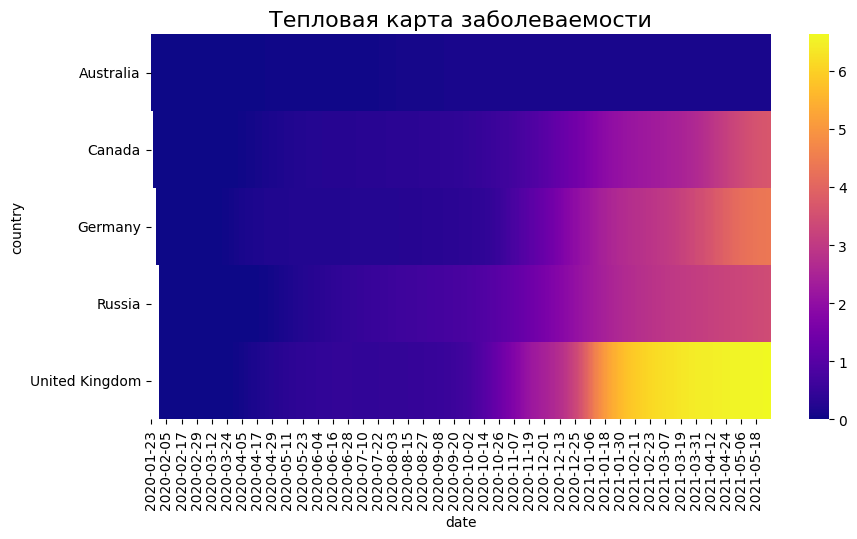

In [31]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

* A Из представленных стран самые быстрые темпы роста относительной заболеваемости — в Великобритании.

* D Из представленных стран самая низкая скорость распространения вируса — в Австралии.

*Задание 6.5*

Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
Выберите верные выводы по данному графику:

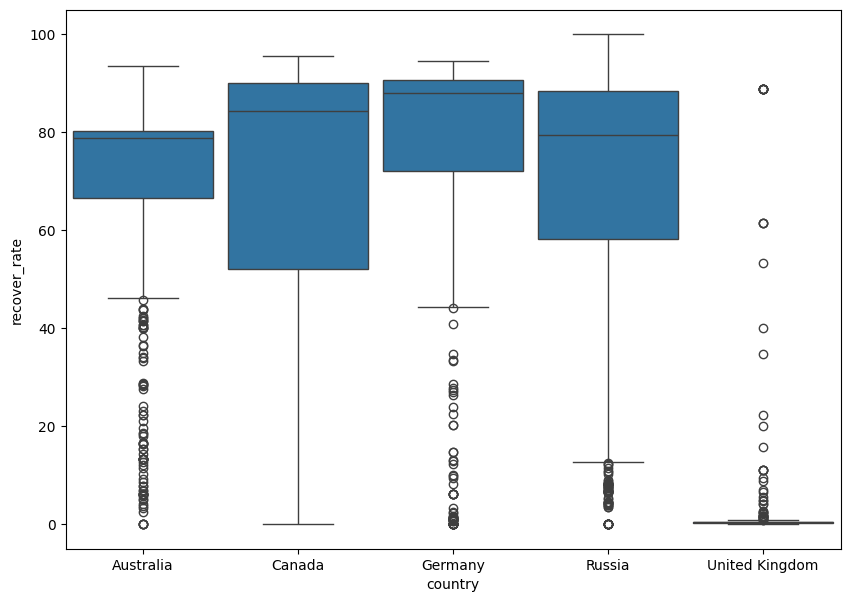

In [37]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)

 A  График для Великобритании имеет «сплюснутый» в нуле вид, что указывает либо на практически полное отсутствие случаев выздоровления, либо, с точки зрения здравого смысла, на неверные данные о числе выздоровевших пациентов в этой стране.

 B  Наибольший разброс по проценту ежедневных выздоровлений — в Канаде.